

![Trading Table](screenshot_quant_q1.jpg)


## My Solution
Model as a graph problem
Single source, shortest-path problem from (Seashells, 2) to (Seashells, X) within 4 walks
Shortest path with k edges

Create dummy source node
create dummy end node

Dijkstras with negative edges only, and no cycle, since we reduce by 1 hop each time

In [1]:
import functools

import networkx as nx
import matplotlib.pyplot as plt
import math
import functools

In [2]:
currencies = ["USD", "EUR", "HKD"]

trading_table = {"USD": {"USD": 1, "EUR": 0.8, "HKD": 10},
                 "EUR": {"USD": 1.3, "EUR": 1, "HKD": 12},
                 "HKD": {"USD": 0.12, "EUR": 0.1, "HKD": 1}}

G = nx.DiGraph()
G.add_nodes_from((currency, i) for currency in ["EUR", "HKD"] for i in range(4, 0, -1))
G.add_nodes_from(("USD", i) for i in range(0, 6))

for currency, trades_remaining in G.nodes:
    if trades_remaining == 0:
        continue
    elif trades_remaining == 1:
        G.add_edge((currency, trades_remaining), ("USD", 0), weight= -math.log(trading_table[currency]["USD"]))
    else:
        for curr in currencies:
            G.add_edge((currency, trades_remaining), (curr, trades_remaining - 1), weight= -math.log(trading_table[currency][curr]))

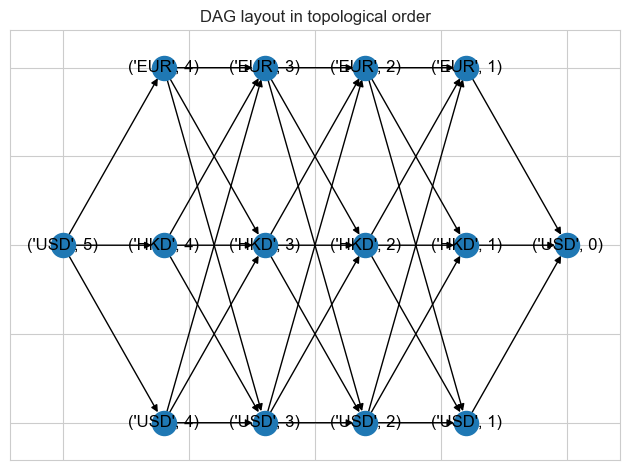

In [3]:
for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

In [6]:
best_path = nx.bellman_ford_path(G, ("USD", 5), ("USD", 0))
expected_arbitrage = math.exp(-nx.bellman_ford_path_length(G, ("USD", 5), ("USD", 0)))
actual_arbitrage = functools.reduce(lambda x, y: x * y, (trading_table[best_path[i][0]][best_path[i+1][0]] for i in range(len(best_path) - 1)))
starting_amount = 1000000
print(best_path)
print(f"Expected Arbitrage: {expected_arbitrage}, Actual Arbitrage: {actual_arbitrage}")
print(f"Starting Amount: {starting_amount} USD, After Trades: {starting_amount * actual_arbitrage}")
oeashells
print(f"Return on investment: {starting_amount * actual_arbitrage - starting_amount}")

[('USD', 5), ('HKD', 4), ('USD', 3), ('HKD', 2), ('EUR', 1), ('USD', 0)]
Expected Arbitrage: 1.5600000000000012, Actual Arbitrage: 1.5600000000000003
Starting Amount: 1000000 USD, After Trades: 1560000.0000000002
Return on investment: 560000.0000000002


In [5]:
1.34 * 0.5 * 3.1 * 0.67 * 0.75

1.0436925000000001